In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the elasticity summary
elasticity_summary = pd.read_csv('../data/elasticity_summary.csv')  

# Load average price and quantity per product
df = pd.read_csv('../data/sales_model_ready.csv')  
avg_price_qty = df.groupby('StockCode').agg({'UnitPrice': 'mean', 'Quantity': 'mean'}).reset_index()

# Merge with elasticity
df_sim = pd.merge(avg_price_qty, elasticity_summary, on='StockCode', how='inner')

# Define a price range (80% to 120% of current price)
price_factors = np.linspace(0.8, 1.2, 21)

# Simulate revenue for each product
simulation_results = []

for _, row in df_sim.iterrows():
    stock_code = row['StockCode']
    p0 = row['UnitPrice']
    q0 = row['Quantity']
    e = row['Avg_Elasticity']
    
    for f in price_factors:
        new_price = p0 * f
        new_quantity = q0 * (f ** e)
        new_quantity = np.floor(new_quantity).astype(int) # Q_new = Q0 * (P_new / P0)^e
        revenue = new_price * new_quantity
        simulation_results.append({
            'StockCode': stock_code,
            'PriceFactor': f,
            'SimulatedPrice': new_price,
            'SimulatedQuantity': new_quantity,
            'SimulatedRevenue': revenue
        })

df_simulated = pd.DataFrame(simulation_results)


C:\Users\divya\AppData\Local\Temp\ipykernel_69480\1924916161.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/sales_model_ready.csv')


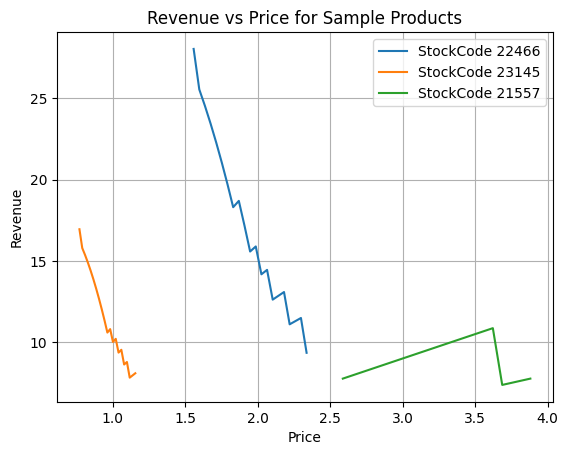

In [10]:
# Pick 3 random products to visualize
sample_codes = df_simulated['StockCode'].drop_duplicates().sample(3)

for code in sample_codes:
    df_plot = df_simulated[df_simulated['StockCode'] == code]
    plt.plot(df_plot['SimulatedPrice'], df_plot['SimulatedRevenue'], label=f'StockCode {code}')

plt.xlabel('Price')
plt.ylabel('Revenue')
plt.title('Revenue vs Price for Sample Products')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
df_simulated.to_csv('../data/price_simulation_results.csv', index=False)

Simulate Revenue at Different Price Points

Using the elasticity estimates, we simulated how revenue would change if each product’s price was increased or decreased in 5% steps from 80% to 120% of the current average.

- It lets us visualize the revenue curve for every product.
- Helps find the price point that maximizes revenue.
- Serves as the foundation for recommending prices in the next step.

We used the elasticity formula:

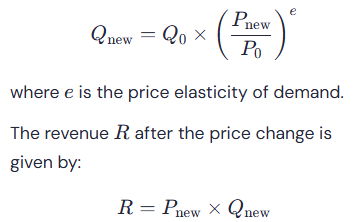
